In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = '/Users/forheart/Downloads/yelp_dataset/yelp_academic_dataset_review.json'

In [3]:
max_records = 1e5
df = pd.read_json(file, lines=True, chunksize=max_records)
data = pd.DataFrame()
try:
   for df_chunk in df:
       data = pd.concat([data, df_chunk])
except ValueError:
       print ('\nSome messages in the file cannot be parsed')

In [4]:
data.shape

(5996996, 9)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [8]:
# Create a pandas series containing the number of reviews for all businesses.
bybusiness = data['business_id'].value_counts()

In [9]:
df_business = pd.DataFrame({'business_id':bybusiness.index, 'review_counts':bybusiness.values})

In [10]:
df_business.shape

(188593, 2)

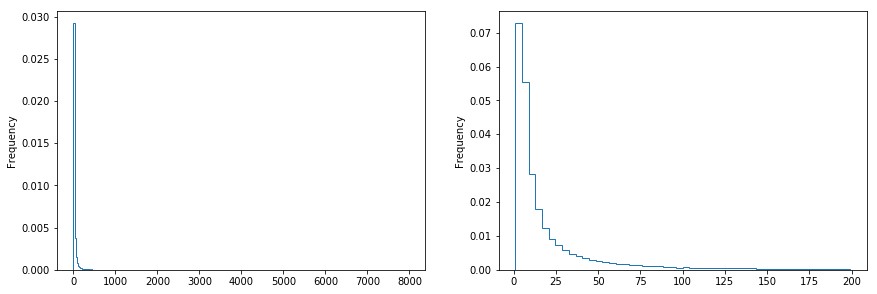

In [13]:
plt.subplot(1, 2, 1)
df_business['review_counts'].plot(kind='hist', bins=300, histtype='step', density=True)
plt.subplot(1, 2, 2)
df_business['review_counts'][df_business['review_counts'] < 200].plot(kind='hist', bins=50, histtype='step', density=True)
plt.subplots_adjust(left=0.125, bottom=0.1, right=2, top=1, wspace=None)

In [18]:
print(np.percentile(df_business['review_counts'], [0, 95]))
print(np.percentile(df_business['review_counts'], [0, 75]))

[  1. 123.]
[ 1. 24.]


The histograms of the review counts show and 95% percentile show that 95% of business have less than 123 reviews, and 75% of the businesses have less than 24 reviews. In order to avoid those businesses that have very little reviews, I will randomly sample 1000 busineses from the top 5% businesses with most reviews. 

In [24]:
# the 5% businesses (9430 businesses) with most reviews. These busineses have more than 123 reviews.
business_sample = df_business.iloc[:9430]

# Ramdomly sample 1000 businesses.
business_sub = business_sample.sample(1000, random_state=1)

In [25]:
business_sub['review_counts'].sum()

308429

In [27]:
business_sub.head()

,business_id,review_counts
7555,fpADWrjAQwJJrBMBdBCvJg,146
3005,eOl6WS3oAjtGZpcXfv8tlA,282
5636,mnU3iGsL55MCWXiWV3AcAQ,183
8800,2gI7dlktBQXPZiuOW-HWvw,129
3832,JogUSDKa1xyG3lLEmD4Xjg,242


In [28]:
review = pd.merge(business_sub, data, on='business_id', how='left')

In [29]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308429 entries, 0 to 308428
Data columns (total 10 columns):
business_id      308429 non-null object
review_counts    308429 non-null int64
cool             308429 non-null int64
date             308429 non-null datetime64[ns]
funny            308429 non-null int64
review_id        308429 non-null object
stars            308429 non-null int64
text             308429 non-null object
useful           308429 non-null int64
user_id          308429 non-null object
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 25.9+ MB


In [39]:
review = review.drop(columns=['review_counts', 'cool', 'funny', 'useful'])

In [40]:
review.head()

,business_id,date,review_id,stars,text,user_id
0,fpADWrjAQwJJrBMBdBCvJg,2016-12-19,OEmutkjxr6ievjXvrgFGMA,1,"WOWOWOowow, jeeeeeeeeeeeeze. There is so much ...",0WcHiM_jT1jN-wxk790qBg
1,fpADWrjAQwJJrBMBdBCvJg,2017-05-23,qOqpwCwGtZH9RJc2gs4Dew,1,This location has the worst drive through I've...,Vo_68hV91XR04bZ993MKCg
2,fpADWrjAQwJJrBMBdBCvJg,2015-04-26,FWUnbMw4TvgdrBZD8G0JNw,1,"First time I tried Tropical smoothie, not impr...",0rHzL5Qy-IFrwSmRKehx2Q
3,fpADWrjAQwJJrBMBdBCvJg,2017-08-30,miJm99wYp5Z0SOzCwXtzVw,1,If you enjoy spending 10 mins in drive thru be...,SwzCXae8zEi77FA3hjYd1w
4,fpADWrjAQwJJrBMBdBCvJg,2014-06-14,nHTCFqKMq85UQKqGFMVA2Q,5,I gave it 5 stars just because I didn't have a...,hktqVwzT-qIordt-MAfa-Q


In [53]:
review.to_csv('review_sample')

In [3]:
review = pd.read_csv('review_sample')

In [4]:
review = review.sample(30000, random_state=1)

In [9]:
review = review.drop(columns=['Unnamed: 0'])

In [10]:
review.head()

,business_id,date,review_id,stars,text,user_id
102461,hL5tldgv2eLcL-AUnPZ9gA,2017-08-03,G5Hex0EKC_yPjj1VKozvkA,4,"After going through 10 plumbers, Pure Plumbing...",8W4969tAJqsmzQVeCRnRZQ
186239,wsa4S6L7WPRgL17KP4JxYg,2017-02-16,V7Op-5roBJjbaagsLpcCoQ,3,This is one of those times I wish there was a ...,LXJ9QLI8V4zDC_kBhKOKhw
304047,KU7eFCdA47v6zeKF3a7j6A,2014-01-26,iG6oVFCJOhw0A1hFdyOIEg,3,I have eaten here many times. I like that they...,S6XOGg1gJ-5iNWj0Au-zgw
224014,oo-kGk1BEWpuDvSE4gfmgQ,2017-09-06,dmYJfNt8xmoQUjnPv4BGcw,4,Another hit for Fox Restaurants. A great mix o...,r64WY53LOMRPowHDu2JIXw
1609,gYAM9MZ_s-YKIUZSZ2Evyg,2014-07-25,0dgKI1OjOarPP0sKzOiIsg,4,I ordered a blonde beer and a 12 oz N.Y. strip...,vt02GdkuHPBnJNQmtZr3OQ


## Exploratory Data Analysis

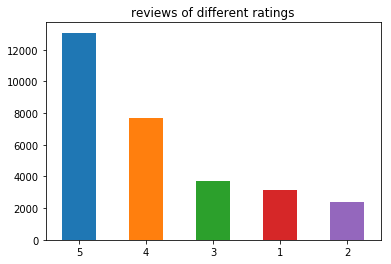

In [15]:
rating = review['stars'].value_counts()
rating.plot(kind='bar', title = 'reviews of different ratings', rot=0)

The 5 star reviews have the most counts, followed by 4, 3, 1 and 2.

In [16]:
print('There are {} unique users that wrote {} reviews.'.format(review.user_id.nunique(), review.shape[0]))

There are 27403 unique users that wrote 30000 reviews.


In [47]:
import seaborn as sns

In [49]:
review['text_length'] = review['text'].apply(lambda x:len(x.split()))

stars
1    145.021485
2    150.284176
3    139.252643
4    119.351260
5     91.526968
Name: text_length, dtype: float64

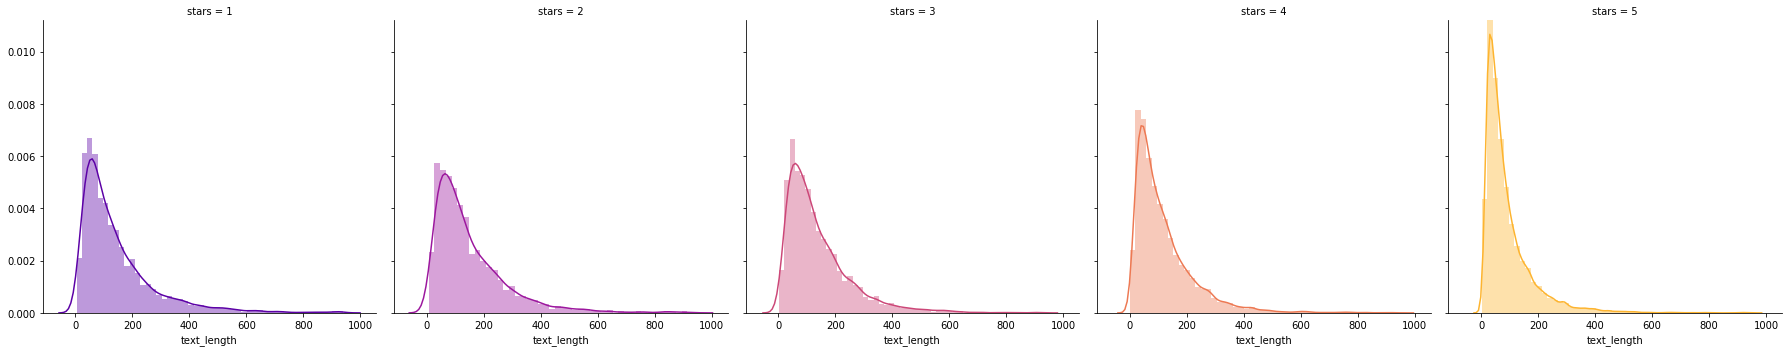

In [52]:
a = sns.FacetGrid(data = review, col = 'stars', hue = 'stars', palette='plasma', size=5)
a.map(sns.distplot, "text_length")
review.groupby('stars').mean()['text_length']

The above analysis shows that people who tend to review a business as good (4 or 5 stars) have shorter reviews (91 or 119 words), and the reviews that have poor ratings (1 or 2) tend to be longer (145 to 150 words.

## Prediction of the ratings

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [18]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(review.text)
X = X.tocsc()
y = review.stars.values

In [19]:
# Multinomial Naive Bayes without cross validation
nb = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
y_pred = nb.predict(X_test)

In [21]:
y_pred[:10]

array([5, 1, 5, 5, 4, 1, 4, 5, 4, 5])

In [22]:
print('The accuracy score for the train set is', nb.score(X_train, y_train))
print('The accuracy score for the test set is', nb.score(X_test, y_test))

The accuracy score for the train set is 0.7367916666666666
The accuracy score for the test set is 0.598


In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 443,   69,   67,   29,   25],
       [ 123,   65,  170,  106,   19],
       [  61,   35,  218,  320,  104],
       [  41,   20,   70,  790,  611],
       [  87,    8,   22,  425, 2072]])

In [25]:
# Print the first 10 features of the count_vectorizer
print(vectorizer.get_feature_names()[:10])

['00', '000', '0000', '000th', '00am', '00p', '00pm', '01', '012', '01pm']


In [30]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(X_test.shape[1]) #Return a 2-D array with ones on the diagonal and zeros elsewhere.

x.shape

prob = nb.predict_log_proba(x)

In [31]:
probs = prob[:, 0]

In [32]:
ind = np.argsort(probs)  #Returns the indices that would sort an array

In [33]:
# Here we define the good_words to be the words used most in reviews with 5 stars.

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = prob[ind[:10]]
bad_prob = prob[ind[-10:]]

In [36]:
good_words

array(['cozy', 'delish', 'perfection', 'museum', 'brew', 'sangria',
       'delicious', 'omelet', 'tart', 'maple'], dtype='<U55')

In [37]:
bad_words

array(['disgusted', 'tft', 'incompetent', 'contract', 'cancel', 'scam',
       'pst', 'outage', 'airline', 'cox'], dtype='<U55')

In [54]:
# Multinomial Naive Bayes with cross validation
nb = MultinomialNB()
cv_scores = cross_val_score(nb, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.58863712 0.6005     0.59333333 0.59283333 0.60386796]
Average 5-Fold CV Score: 0.5958343487223351


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(min_df=1, stop_words='english')
X_tfidf = tfidfvectorizer.fit_transform(review.text)
y_tfidf = review.stars.values

In [56]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=1, stratify=y)
clf_tfidf = MultinomialNB().fit(Xt_train, yt_train)

In [57]:
print('The accuracy score for the train set is', clf_tfidf.score(Xt_train, yt_train))
print('The accuracy score for the test set is', clf_tfidf.score(Xt_test, yt_test))

The accuracy score for the train set is 0.47804166666666664
The accuracy score for the test set is 0.4555


In [59]:
from sklearn import metrics

In [60]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(Xt_train, yt_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(Xt_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.5091666666666667

Alpha:  0.1
Score:  0.5563333333333333

Alpha:  0.2
Score:  0.5345

Alpha:  0.30000000000000004
Score:  0.5235

Alpha:  0.4
Score:  0.5085

Alpha:  0.5
Score:  0.49633333333333335

Alpha:  0.6000000000000001


/Users/forheart/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.48433333333333334

Alpha:  0.7000000000000001
Score:  0.4741666666666667

Alpha:  0.8
Score:  0.4666666666666667

Alpha:  0.9
Score:  0.46016666666666667



In [63]:
# Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

KeyboardInterrupt: 

In [64]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [65]:
# Try to use a random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier().fit(X_train, y_train)

/Users/forheart/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [68]:
print('The accuracy score for the train set is', rf.score(X_train, y_train))
print('The accuracy score for the test set is', rf.score(X_test, y_test))

The accuracy score for the train set is 0.991625
The accuracy score for the test set is 0.4905
